In [50]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [51]:
k = np.double(8.987551782E9)
G = np.double(6.6743E-11)

# A THING will be an array of 8 elements.
    # THING[0] Mass
    # THING[1] Charge
    # THING[2] X position
    # THING[3] Y position
    # THING[4] Z position
    # THING[5] X velocity
    # THING[6] Y velocity
    # THING[7] Z velocity
    
# M_e = 9.1093837015E-31
# Q_e = -1.602176634E-19
# M_p = 1.67262192369E-27
# Q_p = 1.602176634E-19

Electron = np.array([
    9.1093837015E-31,
    -1.602176634E-19,
    1,
    0,
    0,
    0,
    14,
    0
] , dtype = np.double )

Proton = np.array([
    1.67262192369E-27,
    1.602176634E-19,
    0,
    0,
    0,
    0,
    0,
    0
] , dtype = np.double )

Electron_x = np.array([], dtype = np.double )
Electron_y = np.array([], dtype = np.double )
Electron_z = np.array([], dtype = np.double )

Proton_x = np.array([], dtype = np.double )
Proton_y = np.array([], dtype = np.double )
Proton_z = np.array([], dtype = np.double )

F_e = np.array([], dtype = np.double )
F_g = np.array([], dtype = np.double )

T = 1E-4
dT = 1E-9

n = T/dT

count0 = 0

while count0 < n :
    
    Electron_x = np.append( Electron_x , Electron[2] )
    Electron_y = np.append( Electron_y , Electron[3] )
    Electron_z = np.append( Electron_z , Electron[4] )
    
    Proton_x = np.append( Proton_x , Proton[2] )
    Proton_y = np.append( Proton_y , Proton[3] )
    Proton_z = np.append( Proton_z , Proton[4] )
    
    dx = Electron[2] - Proton[2]
    dy = Electron[3] - Proton[3]
    dz = Electron[4] - Proton[4]
    
    r = np.sqrt( dx**2 + dy**2 + dz**2 )
    
    Fe = k * Electron[1] * Proton[1] / r**2
    Fg = -G * Electron[0] * Proton[0] / r**2
    
    F_e = np.append( Fe , F_e )
    F_g = np.append( Fe , F_g )
    
    Electron[2] = Electron[2] + Electron[5] * dT + np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg ) * dT**2 / Electron[0] / 2
    Electron[3] = Electron[3] + Electron[6] * dT + np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg ) * dT**2 / Electron[0] / 2
    Electron[4] = Electron[4] + Electron[7] * dT + np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg ) * dT**2 / Electron[0] / 2
    
    Electron[5] = Electron[5] + np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg ) * dT / Electron[0]
    Electron[6] = Electron[6] + np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg ) * dT / Electron[0]
    Electron[7] = Electron[7] + np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg ) * dT / Electron[0]
    
    Proton[2] = Proton[2] + Proton[5] * dT - np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg ) * dT**2 / Proton[0] / 2
    Proton[3] = Proton[3] + Proton[6] * dT - np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg ) * dT**2 / Proton[0] / 2
    Proton[4] = Proton[4] + Proton[7] * dT - np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg ) * dT**2 / Proton[0] / 2
    
    Proton[5] = Proton[5] - np.cos(np.arctan2(np.sqrt(dy**2+dz**2),dx)) * ( Fe + Fg ) * dT / Proton[0]
    Proton[6] = Proton[6] - np.cos(np.arctan2(np.sqrt(dx**2+dz**2),dy)) * ( Fe + Fg ) * dT / Proton[0]
    Proton[7] = Proton[7] - np.cos(np.arctan2(np.sqrt(dx**2+dy**2),dz)) * ( Fe + Fg ) * dT / Proton[0]
    
    count0 = count0 + 1

<Figure size 432x288 with 0 Axes>

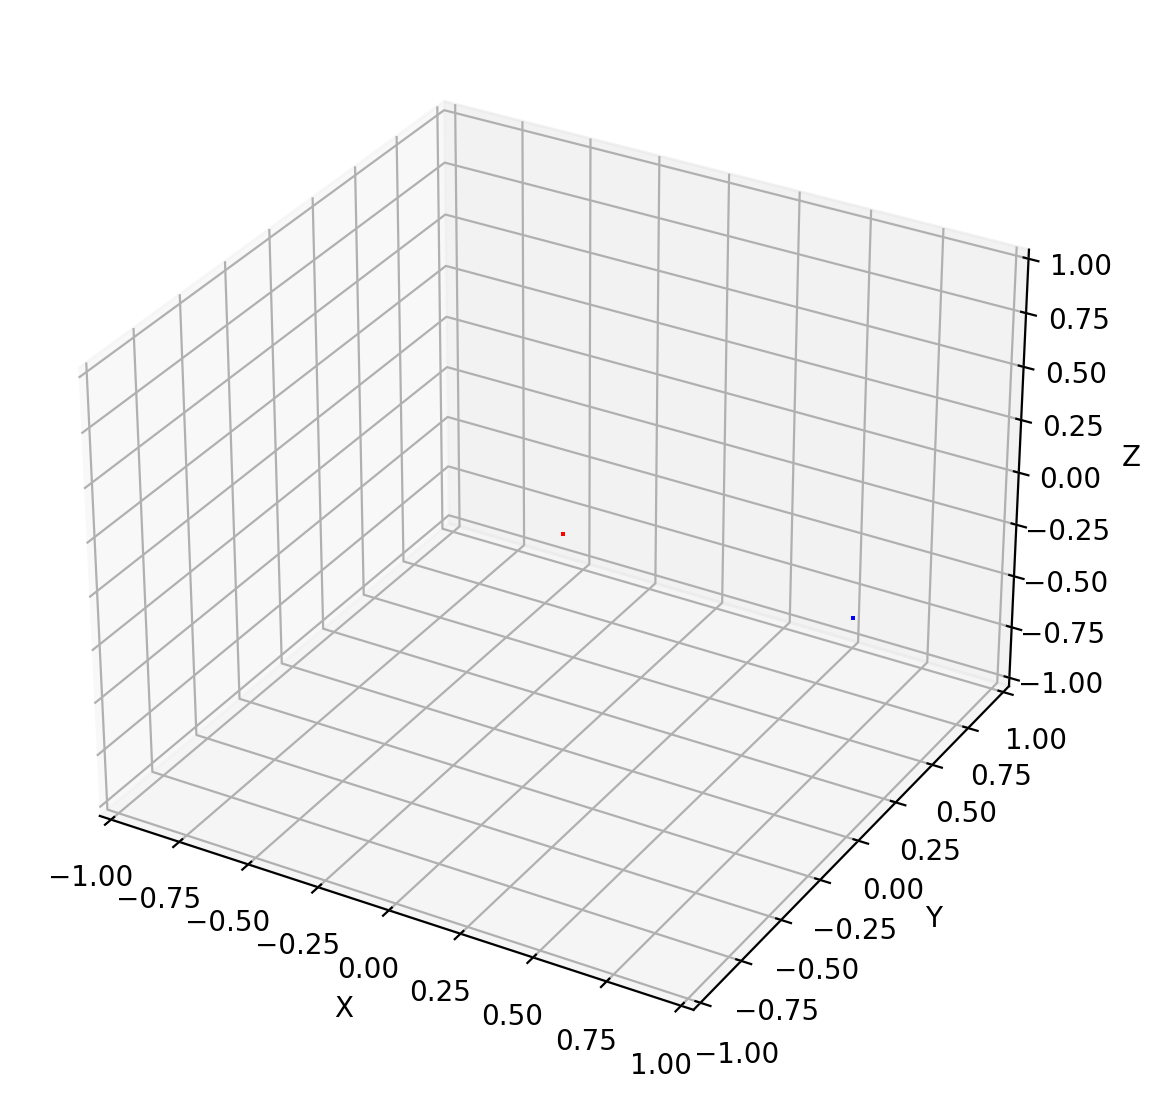

In [60]:
Boundary = 1

fig = plt.figure()

plt.figure( figsize = ( 14 , 7 ) , dpi = 200 )

ax = plt.axes( projection = "3d" )

Electron_x2 , Electron_y2 , Electron_z2 , Proton_x2 , Proton_y2 , Proton_z2 = np.loadtxt( "D:\Education\FORTRAN\data.csv" , unpack = 1 )
F_e2 , F_g2 = np.loadtxt( "D:\Education\FORTRAN\data2.csv" , unpack = 1 )

ax.scatter3D( Electron_x , Electron_y , Electron_z , c = "#0000FF" , s = 0.05 , marker = "," )
ax.scatter3D( Proton_x , Proton_y , Proton_z , c = "#FF0000" , s = 0.05 , marker = "," )

ax.scatter3D( Electron_x2 , Electron_y2 , Electron_z2 , c = "#0000FF" , s = 0.05 , marker = "," )
ax.scatter3D( Proton_x2 , Proton_y2 , Proton_z2 , c = "#FF0000" , s = 0.05 , marker = "," )

ax.set_xlim3d( left = -Boundary , right = Boundary )
ax.set_ylim3d( bottom = -Boundary , top = Boundary )
ax.set_zlim3d( bottom = -Boundary , top = Boundary )

ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_zlabel( "Z" )

plt.show()

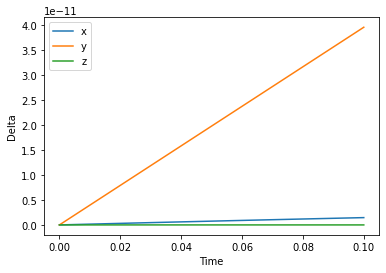

In [61]:
t = np.linspace( 0 , 1E-1 , 100000 )

plt.xlabel( "Time" )
plt.ylabel( "Delta" )

plt.plot( t , Electron_x - Electron_x2 , label = "x" )
plt.plot( t , Electron_y - Electron_y2 , label = "y" )
plt.plot( t , Electron_z - Electron_z2 , label = "z" )

plt.legend()

plt.show()

In [59]:
np.size(Electron_x2)

100001